# Import all necessary dependencies and print out tensorflow and python versions.

In [1]:
import sys

import so_ml_tools as soml

import tensorflow as tf

from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.losses import binary_crossentropy
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn import datasets

2023-11-22 13:37:08.311053: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 13:37:08.311073: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 13:37:08.311093: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Create a circles dataset and visualize the data

In [2]:
# Create dataset containing the X/Y coordinates and labels.
X, y = datasets.make_circles(n_samples=500, shuffle=True, random_state=42)

In [3]:
# Let's visualize the dataset first, let's look at 10 samples of the X and 10 samples of the Y
X[:10], y[:10]

(array([[-0.75098709,  0.27571434],
        [-0.26084151,  0.96538164],
        [-0.79974735,  0.02010408],
        [-0.72896863, -0.68454711],
        [-0.86392342,  0.5036232 ],
        [-0.71050916, -0.36766389],
        [-0.79898957, -0.04019545],
        [-0.99968419,  0.0251301 ],
        [-0.13779029,  0.99046143],
        [ 0.2472136 , -0.76084521]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1]))

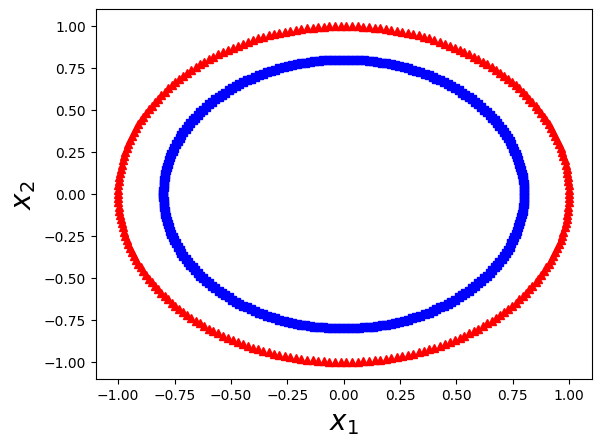

In [4]:
# Call the function to plot the data visually
soml.data.plot.xy_data_with_label(x=X, y=y)

### The X values are not normalized, they have both negative and positive numbers as their coordinate system, we need to try to normalize this so that the values are between 0 and 1. The Y values are either 0 or 1 which is just fine.

# Normalize the data, neural networks like to have their data between 0 and 1.

In [5]:
# Call the function with our X dataset to create the X_norm normalized dataset.
X_norm = soml.data.normalize.normalize_vector(x=X)

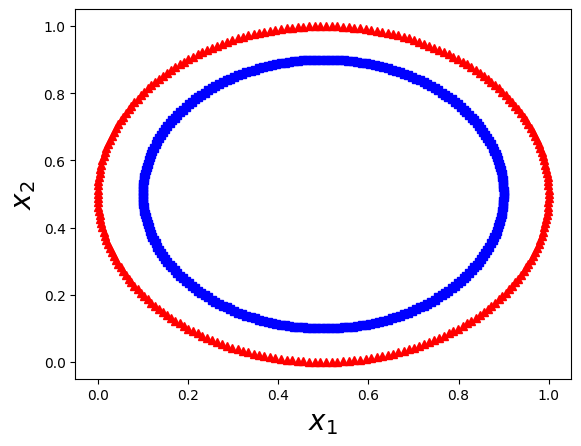

In [6]:
# Create the visualization again to see if everything worked out fine.
soml.data.plot.xy_data_with_label(x=X_norm, y=y)

### Now that the data is normalized we can split the data up into a training set and a test set.

# Create train / test datasets from the generated data

In [7]:
# Split the data up into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 400
Test size: 100


# Create a first baseline model, and display the model details.

In [8]:
tf.random.set_seed(42)

# Create the model
model_1 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Display the model information
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-22 13:37:10.302427: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [9]:
# Compile the model
model_1.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 0s 7ms/step - loss: 0.7291 - accuracy: 0.5175 - val_loss: 0.7617 - val_accuracy: 0.4300
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.5175 - val_loss: 0.7324 - val_accuracy: 0.3800
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.4650 - val_loss: 0.7126 - val_accuracy: 0.4200
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5175 - val_loss: 0.7028 - val_accuracy: 0.4200
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5225 - val_loss: 0.6989 - val_accuracy: 0.4500
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5325 - val_loss: 0.6965 - val_accuracy: 0.4400
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5350 - val_loss: 0.6942 - val_accuracy: 0.4500
Epoch 8/50
13/13 [==

### To model has finished the training, the results are not that great, the validation accuracy is only 65%, it is better then guessing but still not great. Let's plot the history in a graph to see if we can find some causes.

# Create plotting function and display the history

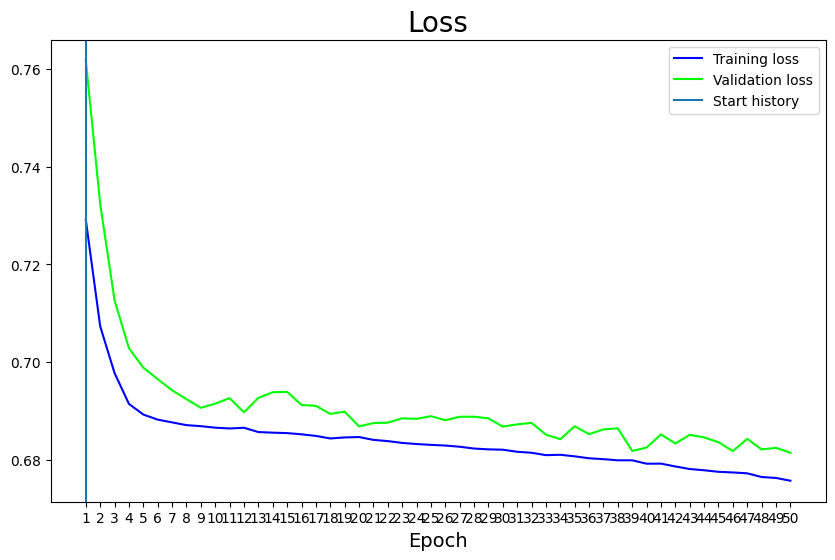

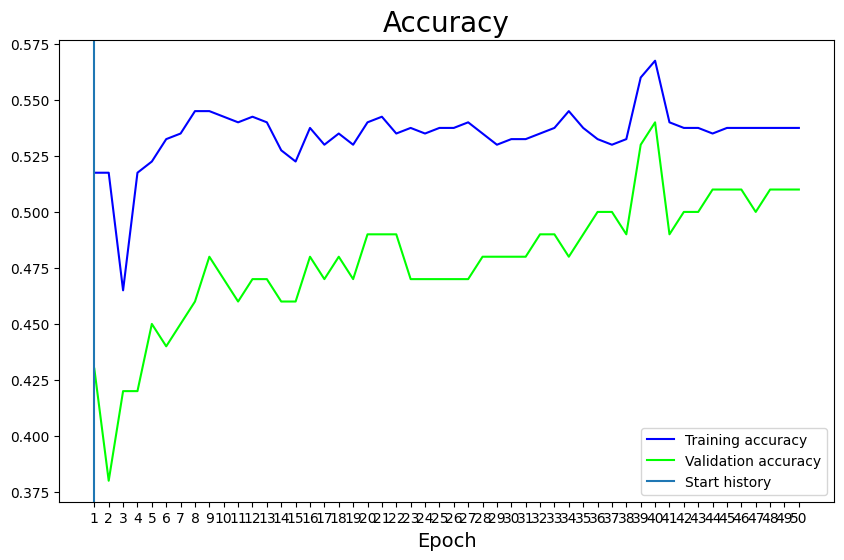

In [10]:
soml.tf.model.plot.plot_history(history=history_1)

### The model is not overfitting since the validation accuracy doesn't diverge from the training accuracy. We do see that the loss is still high so maybe our learning rate is a bit to small. The Adam optimizer has a default learning rate of 0.001. Let's see if we can find a more optimal learning rate.

### Another thing we can check is to see what the decission boundary is, for this we can also create a plot function.

313/313 [==============================] - 0s 308us/step
doing binary classification


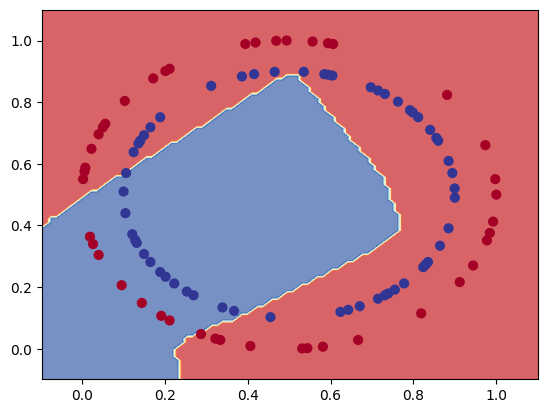

In [11]:
soml.evaluate.plot.decision_boundary(model=model_1, x=X_test, y=y_test)

In [12]:
import itertools as _itertools

import matplotlib.pyplot as _plt
import numpy as _np
import sklearn as _sk
import tensorflow as _tf
import so_ml_tools as _soml

from scipy.interpolate import interp1d as _interp1d

from sklearn.metrics import confusion_matrix as _confusion_matrix
from sklearn.metrics import classification_report as _classification_report


def roc_curve(y_true, y_prob=None, figsize=(5, 5), label_color='black'):
    if isinstance(y_true, _tf.data.Dataset):
        raise TypeError('y_true is a dataset, please get the labels from the dataset using '
                        '\'y_labels = soml.tf.dataset.get_labels(dataset=dataset)\'')

    y_true = _soml.util.label.to_prediction(y_prob=y_true)

    precision_fpr, recall_tpr, thresholds = _sk.metrics.precision_recall_curve(y_true=y_true, probas_pred=y_prob)

    # Calculate Area Under Curve
    auc = _sk.metrics.auc(recall_tpr, precision_fpr)

    # Calculate optimal threshold value:
    optimal_idx = _np.argmax(recall_tpr - precision_fpr)
    optimal_threshold = thresholds[optimal_idx]

    fig, ax = _plt.subplots(figsize=figsize)
    fig.patch.set_alpha(0.0)  # Transparant background

    ax.plot(recall_tpr, precision_fpr)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes) # Draw diagonal line
    ax.plot(recall_tpr[optimal_idx], precision_fpr[optimal_idx], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")

    ax.set(title=f'ROC-Curve \nAUC: {auc}\nOptimal Threshold: {optimal_threshold}',
           xlabel="False Positive Rate",
           ylabel="True Positive Rate")

    ax.xaxis.label.set_color(label_color)  # Set color of x-axis label
    ax.tick_params(axis='x', colors=label_color)  # Set color of x-axis ticks.

    ax.yaxis.label.set_color(label_color)  # Set color of y-axis label
    ax.tick_params(axis='y', colors=label_color)  # Set color of y-axis ticks.
    ax.title.set_color(label_color)  # Set color of title

    _plt.xticks(rotation=70)

    _plt.show()

4/4 [==============================] - 0s 445us/step


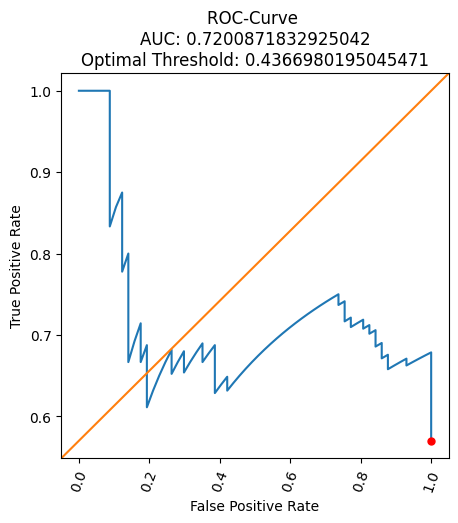

In [13]:
y_prob = model_1.predict(X_test)
roc_curve(y_true=y_test, y_prob=y_prob)

# Find a more optimal learning rate

# Create a new model which will use the learning rate scheduler to adjust the learning rate.

In [14]:
tf.random.set_seed(42)

initial_lr = 0.001
epochs = 50

# Build the same model as model_1
model_2 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=initial_lr),
                metrics=["accuracy"])

lr_scheduler = soml.tf.fit.callback.learning_rate_scheduler_callback(learning_rate_start=initial_lr, epochs=epochs)

# Fit the model
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        callbacks=[
                            lr_scheduler,
                        ])


Min learning rate: 0.0010964781961431851
Max learning rate: 0.1
Division: 24
Epoch 1/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5175 - val_loss: 0.7136 - val_accuracy: 0.4300 - lr: 0.0010
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5100 - val_loss: 0.7074 - val_accuracy: 0.4100 - lr: 0.0011
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4700 - val_loss: 0.7012 - val_accuracy: 0.4600 - lr: 0.0012
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4900 - val_loss: 0.7006 - val_accuracy: 0.4400 - lr: 0.0013
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.4875 - val_loss: 0.7021 - val_accuracy: 0.4600 - lr: 0.0015
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4900 - val_loss: 0.7012 - val_accuracy: 0.4600 - lr: 0.0016
Epoch

### Now let's plot the history and check where the ideal learning rate is.

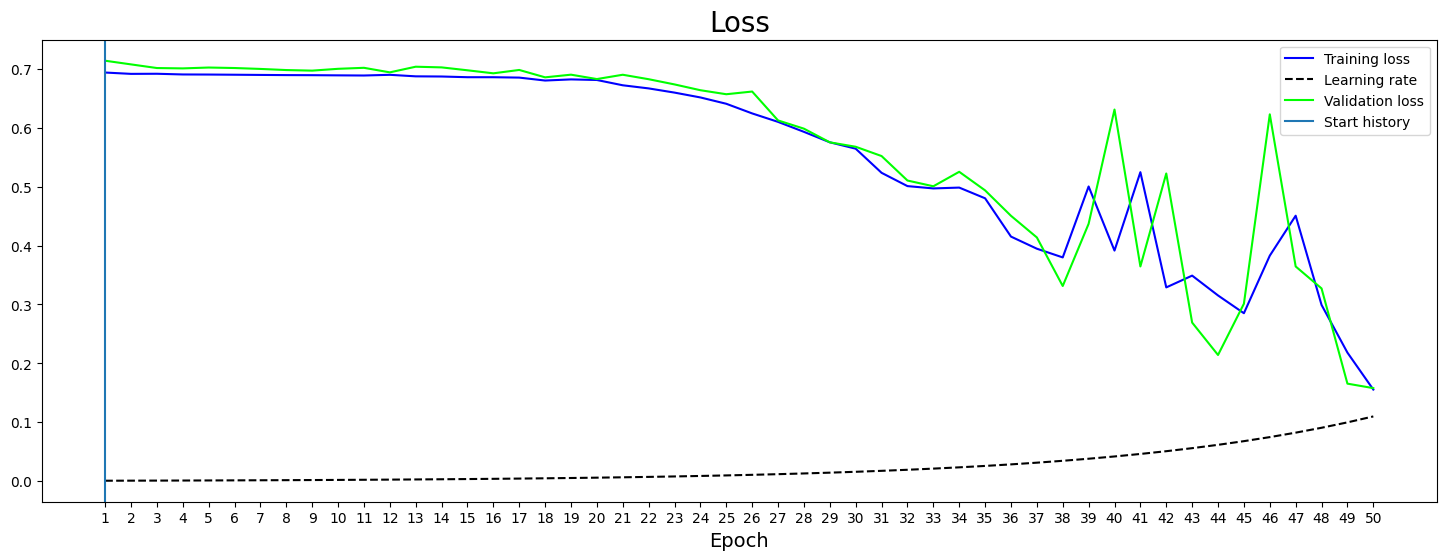

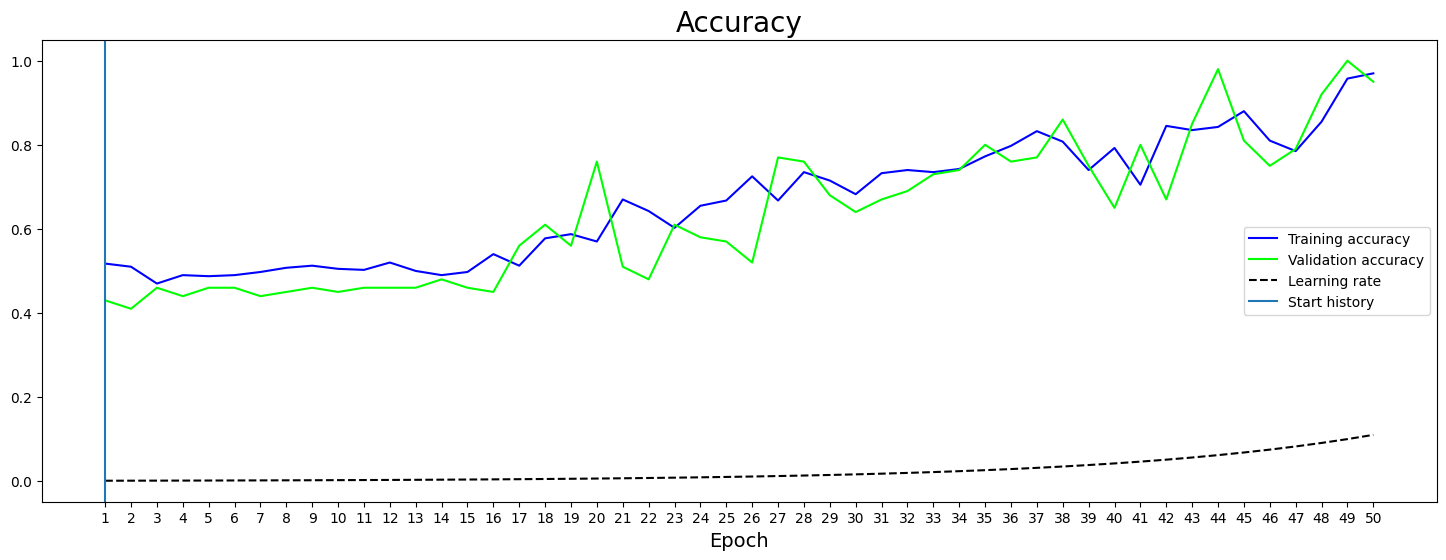

In [15]:
soml.tf.model.plot.plot_history(history=history_2, figsize=(18, 6))


### We can see that in the loss graph the loss is lowest around epoch 36 (counting from 0 that would be 37). After this the loss becomes erratic, so let's look at what the learning rate was at epoch 41 in the fit log above. For me this was around 0.0464. Create a new model and train it again.

In [16]:
# Build the same model as model_1
model_3 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=0.0287),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6969 - accuracy: 0.5200 - val_loss: 0.6896 - val_accuracy: 0.6400
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.4975 - val_loss: 0.6955 - val_accuracy: 0.4300
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.4925 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5175 - val_loss: 0.6914 - val_accuracy: 0.4300
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.5150 - val_loss: 0.6757 - val_accuracy: 0.5400
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6325 - val_loss: 0.6846 - val_accuracy: 0.6300
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.6200 - val_loss: 0.6496 - val_accuracy: 0.5700
Epoch 8/50
13/13 [==

### In my case we achieved 100% validation accuracy around epoch 41. Let's look at the history.

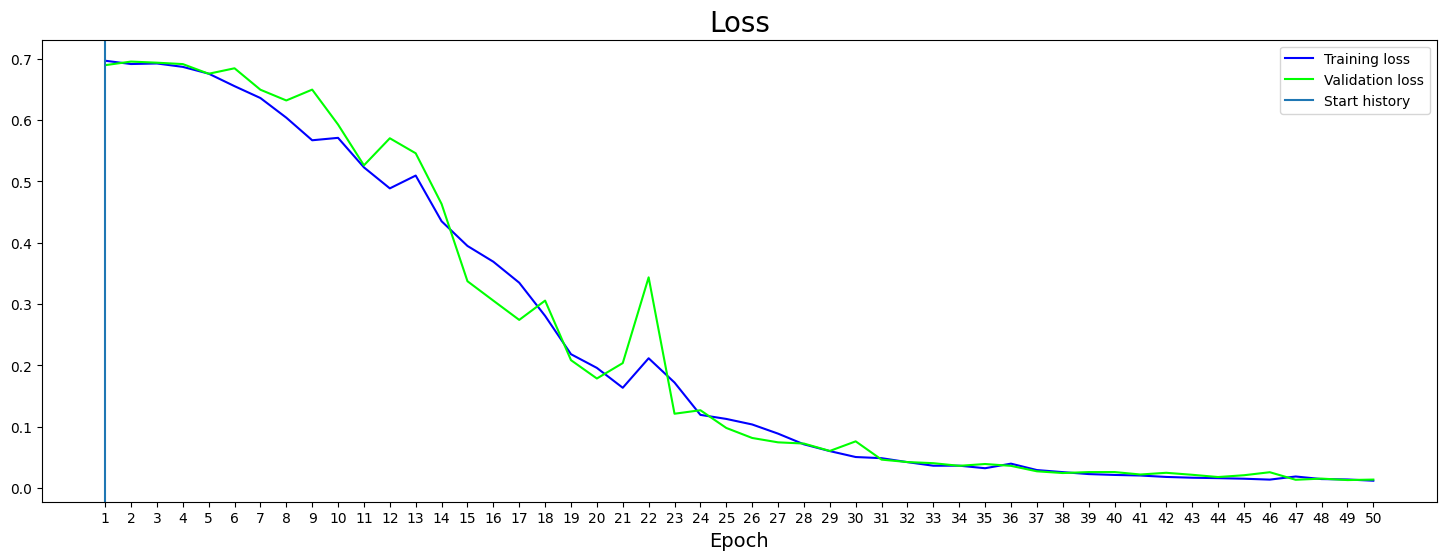

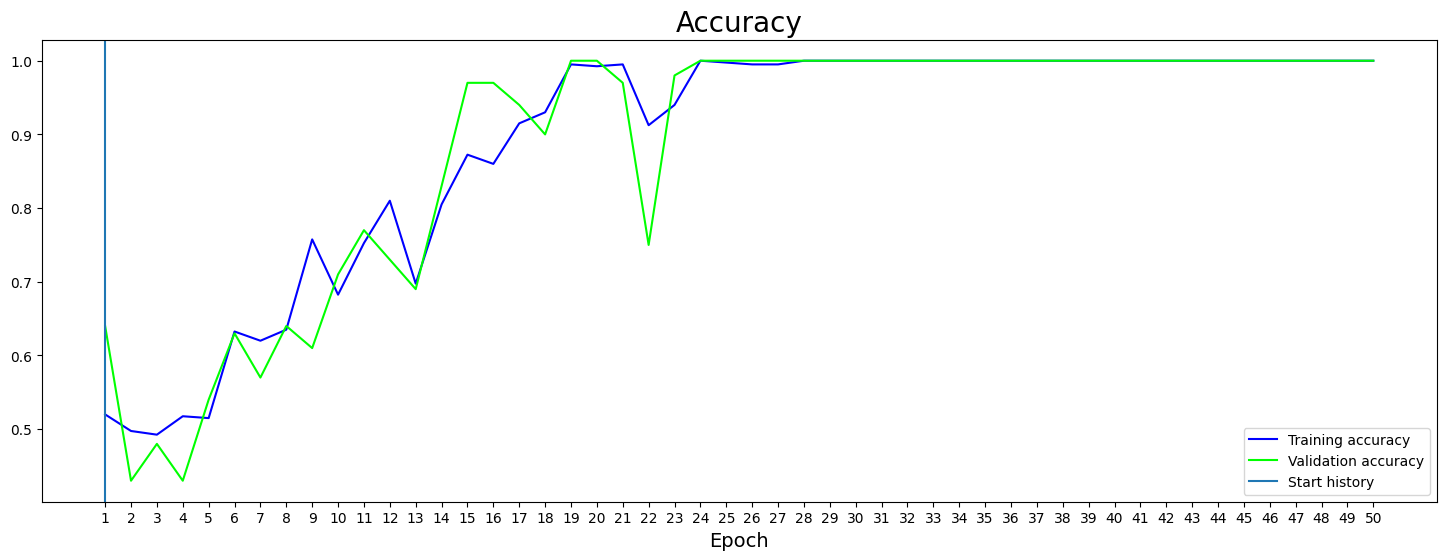

In [17]:
soml.tf.model.plot.plot_history(history=history_3, figsize=(18, 6))

### Let's also check the decission boundary

313/313 [==============================] - 0s 332us/step
doing binary classification


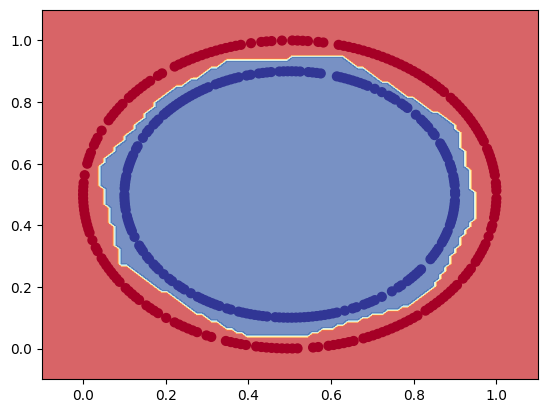

In [18]:
soml.evaluate.plot.decision_boundary(model=model_3, x=X_train, y=y_train)

In [26]:
%matplotlib widget

4/4 [==============================] - 0s 611us/step


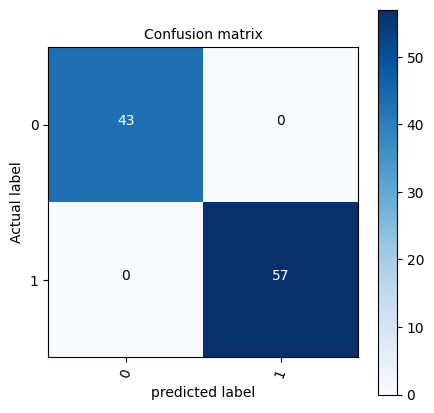

In [20]:
y_prob = model_3.predict(X_test)

soml.evaluate.plot.confusion_matrix(y_true=y_test, y_prob=y_prob, figsize=(5, 5), text_size=10, label_color='black')

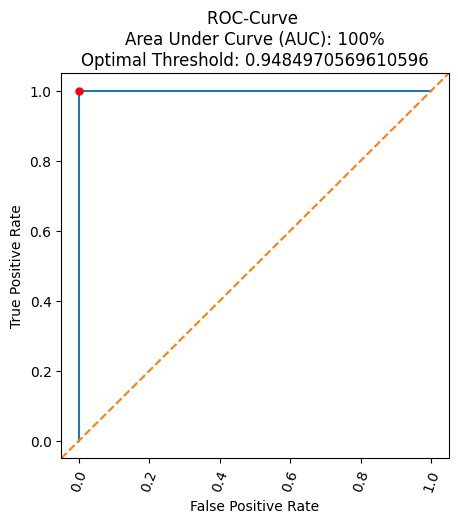

In [23]:
soml.evaluate.plot.roc_curve(y_true=y_test, y_prob=y_prob)

## Another method would be to use a combination of EarlyStopping and ReduceLROnPlateau

In [ ]:
tf.random.set_seed(42)

initial_lr = 0.01
epochs = 100

# Build the same model as model_1
model_4 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=initial_lr),
                metrics=["accuracy"])


# Fit the model
history_4 = model_4.fit(X_train,
                        y_train,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        callbacks=[
                            ReduceLROnPlateau("val_accuracy", verbose=1)
                        ])

In [ ]:
soml.tf.model.plot.plot_history(history=history_4, figsize=(18, 6))